In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [39]:
v0=1000.
g=9.8
th=45*np.pi/180.
m=1.

## Coordinate #1

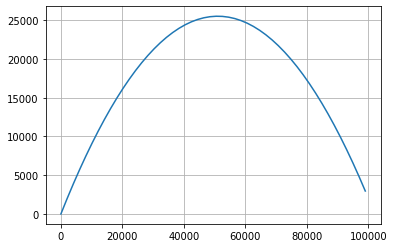

In [42]:
def calc_x1_coord1(v0,th,g,t):
    return v0*cos(th)*t
def calc_x2_coord1(v0,th,g,t):
    return v0*sin(th)*t-0.5*g*t**2

t=np.linspace(0,140)
x1=calc_x1_coord1(v0,th,g,t)
x2=calc_x2_coord1(v0,th,g,t)
grid()
plot(x1,x2)

## Coordiante #2

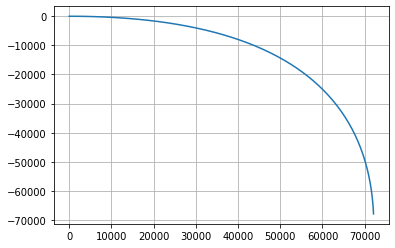

In [43]:
def calc_x1_coord2(v0,th,g,t):
    return v0*t-0.5*g*sin(th)*t**2
def calc_x2_coord2(v0,th,g,t):
    return -0.5*g*cos(th)*t**2

t=np.linspace(0,140)
x1=calc_x1_coord2(v0,th,g,t)
x2=calc_x2_coord2(v0,th,g,t)

grid()
plot(x1,x2)
#plot(x1*rot,x2*rot)

## Checking

In [44]:
#th=-th
rot=np.array([[cos(-th),sin(-th)],
[-sin(-th),cos(-th)]])

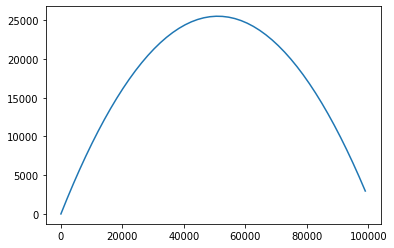

In [45]:
xs=np.array([x1,x2]).T
xnew=np.zeros(xs.shape)
for i in range(len(xs)):
    xold=xs[i,:]
    xnew[i,:]=np.dot(rot,xold)
plot(xnew[:,0],xnew[:,1])    

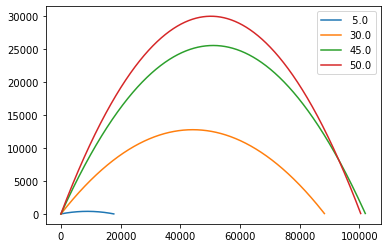

In [66]:
def calc_x1_coord1(v0,th,g,t):
    return v0*cos(th)*t
def calc_x2_coord1(v0,th,g,t):
    return v0*sin(th)*t-0.5*g*t**2


ths=[5,30,45,50]
v0=1000.
g=9.8
for th in ths:
    th=th*np.pi/180.


    t=np.linspace(0,1400,10000)
    x1=calc_x1_coord1(v0,th,g,t)
    x2=calc_x2_coord1(v0,th,g,t)

    ind=x2>-0.1
    x1=x1[ind]
    x2=x2[ind]
    grid()
    plot(x1,x2,label='%4.1f'%(th*180/np.pi))
    
gca().legend()